## Importações:

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation
from itertools import combinations
from scipy.interpolate import interp1d
plt.style.use('seaborn-bright')

In [2]:
from funcoes import Particula, mudar_passo, gerar_particulas, simular_reacao

## Realiza simulação:

In [3]:
#Parâmetros da simulação:

numero_particulas = 100
tamanho_caixa = 100
RAIO = 0.5
MASSA = 1
probabilidade_reacao = 0.3
tipo = 'atomo'

tempo_final = 10
numero_passos = 75
tempo_cada_passo = tempo_final/numero_passos

lista_particulas = gerar_particulas(numero_particulas, RAIO, MASSA, tamanho_caixa, tipo)

## Resultados:

--------------------------

## Simulação da reação química:

- Se ocorre uma reação ela é necessariamente 
- Tem conservação de massa?
- Eu preciso que em algum lugar seja definido o tipo das partículas para eu conseguir fazer um if 
- talvez transformar nossa partícula em uma matriz igual do amauri e tirar o resto das classes
- precisa atualizar a matriz de partículas 
- verificar se há colisão
- Testar se é melhor fazer uma nova classe 'molécula' ou usar 'nova_particula = Particula(nova_massa, novo_raio, nova_posicao, nova_velocidade, tipo)
- Checar se a conservação de volume está no livro
- Tirar uma das partículas e gerar uma nova a partir da outra
- Usar o itertools (tem uma função que não repete) para usar o particula1 com particula2
- itertools.combinations

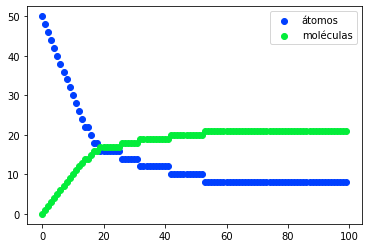

In [4]:
#Parâmetros da simulação:

numero_particulas = 200
tamanho_caixa = 50
RAIO = 2
MASSA = 1
probabilidade_reacao = 0.3
tipo = 'atomo'

tempo_final = 10
numero_passos = 100
tempo_cada_passo = tempo_final/numero_passos

lista_particulas = gerar_particulas(numero_particulas, RAIO, MASSA, tamanho_caixa, tipo)

lista_atomos, lista_moleculas = [], []

# Compute simulation (It takes some time if numero_passos and numero_particulas are large)
for i in range(numero_passos):
     # Simular colisões
    simular_reacao(lista_particulas, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_atomos.append(a_count)
    lista_moleculas.append(m_count)

plt.scatter(list(range(numero_passos)),lista_atomos,label='átomos')
plt.scatter(list(range(numero_passos)),lista_moleculas,label='moléculas')
plt.legend()

## Gerar animação da reação:

C:\Users\DANIEL~1\AppData\Local\Temp/ipykernel_31644/4241441249.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x, y), RAIO, fill=True, color='blue', edgecolor='black')


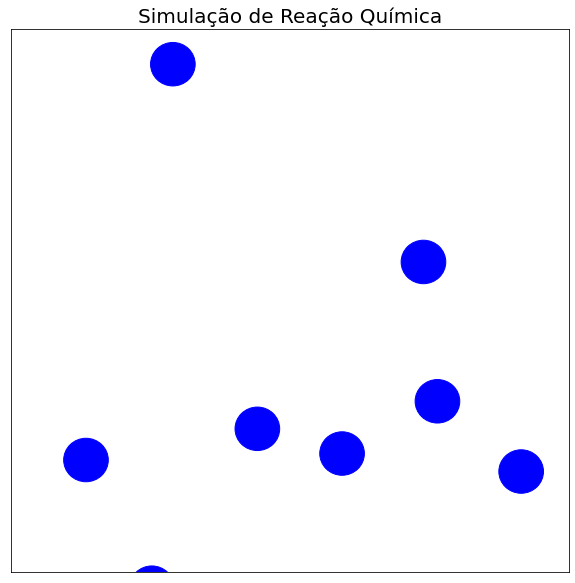

In [5]:
lista_atomos, lista_moleculas = [], []

def criar_animacao_simulacao_reacao(lista_particulas, tamanho_caixa, RAIO, NUM_STEPS, probabilidade_reacao):
    fig, ax = plt.subplots(figsize=(10, 10))
    ims = []

    ax.set_xlim(0, tamanho_caixa)
    ax.set_ylim(0, tamanho_caixa)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Simulação de Reação Química', fontsize=20)
     
    for k in range(NUM_STEPS):
        # Chamando a função para simular reações
        simular_reacao(lista_particulas, probabilidade_reacao)

        # Desenha as partículas após a simulação de reação
        circles = []
        a_count, m_count = 0, 0
        
        for particula in lista_particulas:
            if k < len(particula.todas_posicoes):
                x = particula.todas_posicoes[k][0]
                y = particula.todas_posicoes[k][1]
                circle = plt.Circle((x, y), RAIO, fill=True, color='blue', edgecolor='black')
                ax.add_artist(circle)
                circles.append(circle)
            
            if particula.tipo == 'atomo':
                a_count += 1
            else:
                m_count += 1
        
        lista_atomos.append(a_count)
        lista_moleculas.append(m_count)
        
        ims.append(circles)

    ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True, repeat_delay=100)
    writer = animation.PillowWriter(fps=10, bitrate=4000)
    ani.save("resultados/simulacao_reacao.gif", writer=writer, dpi=100)

criar_animacao_simulacao_reacao(lista_particulas, tamanho_caixa, RAIO, numero_passos, probabilidade_reacao)

## Fitagem com Spline Cúbica:

In [7]:

# Tempo e concentração de átomos
tempo = np.arange(numero_passos)

# Interpolação utilizando spline cúbica
f = interp1d(tempo, concentracao_atomos, kind='cubic')

# Novos pontos de tempo para a curva ajustada 
tempo_novo = np.linspace(tempo.min(), tempo.max(), 1000)

# Avaliação da função ajustada
concentracao_ajustada = f(tempo_novo)

# Agora você tem a concentração ajustada em função do tempo

# plotar os dados e a curva ajustada
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(tempo, concentracao_atomos, 'o', label='Dados Originais')
plt.plot(tempo_novo, concentracao_ajustada, '-', label='Ajuste com Spline Cúbica')
plt.legend()
plt.title('Ajuste com Spline Cúbica')
plt.xlabel('Tempo')
plt.ylabel('Concentração de Átomos')
plt.show()


NameError: name 'concentracao_atomos' is not defined

## Gráfico da derivada da concentração por tempo:

In [6]:
# Calcular a diferença no tempo (assumindo que o intervalo de tempo é constante)
delta_t_novo = tempo_novo[1] - tempo_novo[0]

# Calcular a derivada da concentração ajustada
velocidade_reacao_ajustada = np.gradient(concentracao_ajustada, delta_t_novo)

# taxa de variação da concentração de átomos ajustada em função do tempo
# A velocidade de reação ajustada é d[atomos]/dtempo

# plotando a velocidade de reação ajustada
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(tempo_novo[:-1], velocidade_reacao_ajustada, '-', label='Velocidade de Reação Ajustada')
plt.legend()
plt.title('Velocidade de Reação Ajustada')
plt.xlabel('Tempo')
plt.ylabel('Velocidade de Reação')
plt.show()

NameError: name 'tempo_novo' is not defined